<a href="https://colab.research.google.com/github/avner8943/bootcamp/blob/master/DIP_CV_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt


### Q1

In [85]:
# 1.2
im = cv2.imread('/content/lion.png')

# 1.3
h,w,d = im.shape

print(h,w,d)

279 490 3


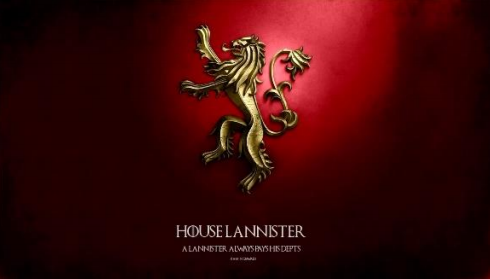

In [86]:
#1.4

cv2_imshow(im)

In [87]:
# 1.5

print(im[200,200,:])

[ 0  0 36]


In [88]:
# 1.6



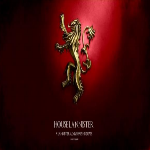

In [89]:
# 1.7

im_resize = cv2.resize(im, (150,150))

cv2_imshow(im_resize)

### **Part 2: Histogram Equaliztion**

###Q1

Histogram equalization is a method in image processing of contrast adjustment using the image's histogram.

### Q2

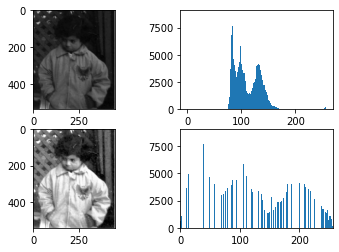

In [90]:
def histogram_equalization(im):

  hist, bins = np.histogram(im.flatten(), bins = 256, density = True)

  h,w = im.shape

  cum_hist = hist.cumsum()

  cum_hist_norm = 255 * cum_hist/cum_hist[-1]

  #print(hist)
  #print(np.round(cum_hist_norm))

  image_equalized = np.interp(im.flatten(), bins[:-1], cum_hist_norm)


  return image_equalized.reshape(im.shape)



im = cv2.imread('/content/hist.png', cv2.IMREAD_GRAYSCALE)


plt.subplot(221), plt.imshow(im, 'gray')
plt.subplot(222), plt.hist(im.ravel(),256,[0,256])
plt.subplot(223), plt.imshow(histogram_equalization(im), 'gray')
plt.subplot(224), plt.hist(histogram_equalization(im).ravel(),256,[0,256])
plt.xlim([0,256])

plt.show()

### **Part 3: Convolution and Kernels part**

### Q1

In [117]:
def conv(mat, ker, stride):

  h, w = mat.shape

  ker_x, ker_y = ker.shape

  h_out = int(np.floor((h-ker_x)/stride)+1)

  w_out = int(np.floor((w-ker_y)/stride)+1)


  mat_pad = np.zeros((h+2,w+2)) # for simpler looping

  mat_pad[1:-1,1:-1] = mat

  out = np.zeros((h_out+2, w_out+2)) # +2 to loop on padding

  ker = ker.flatten()

  

  for x in range(0,w,stride):
    for y in range(0,h, stride):
        out[y, x]=np.dot(ker , mat_pad[y: y+ker_y, x: x+ker_x].flatten())

  return out[1:-1,1:-1]

I = np.zeros((7,7))
I[3,3] = 1

F = np.array([[-1,-2,-1],[-2,4,-2],[-1,-2,-1]])

G = F*-1
G[1,1] *= -1
print(I)

print(conv(I,G,1))

print(conv(I,F,2))

[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
(7, 7)
[[0. 0. 0. 0. 0.]
 [0. 1. 2. 1. 0.]
 [0. 2. 4. 2. 0.]
 [0. 1. 2. 1. 0.]
 [0. 0. 0. 0. 0.]]
(7, 7)


IndexError: ignored

In [110]:
def convolve2D(image, kernel, padding=0, strides=1):
    # Cross Correlation
    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image + Padding
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[0]

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    print(xImgShape,yImgShape,xOutput,yOutput,xKernShape, padding)

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
        print(imagePadded)
    else:
        imagePadded = image

    # Iterate through image
    for y in range(image.shape[1]):
        # Exit Convolution
        if y > image.shape[1] - yKernShape:
            break
        # Only Convolve if y has gone down by the specified Strides
        if y % strides == 0:
            for x in range(image.shape[0]):
                # Go to next row once kernel is out of bounds
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % strides == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break

    return output

print(convolve2D(I,F,0,2))

7 7 3 3 3 0
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 4.]]


In [112]:
import scipy

print(scipy.signal.convolve2d(I,G))

[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 2. 1. 0. 0. 0.]
 [0. 0. 0. 2. 4. 2. 0. 0. 0.]
 [0. 0. 0. 1. 2. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]
